# Section 1:Read form CSV files

In [ ]:
import os, glob

ROOT = "home/training_2018/"

assert os.path.exists(ROOT)

records = sorted([os.path.splitext(os.path.basename(p))[0]
                  for p in glob.glob(os.path.join(ROOT, "*.csv"))])
print("Found", len(records), "records. First 10:", records[:6])

Found 6 records. First 10: ['559-ws-training', '563-ws-training', '570-ws-training', '575-ws-training', '588-ws-training', '591-ws-training']


In [ ]:
import pandas as pd

for record in records[:1]:  
    file_path = os.path.join(ROOT, record + ".csv")
    df = pd.read_csv(file_path)
    print(f"\n--- {record}.csv ---")
    print(df.head())  



--- 559-ws-training.csv ---
          timestamp  glucose_level bolus_type  bolus_dose  \
0  07/12/2021 01:15          101.0          0         0.0   
1  07/12/2021 01:20           98.0          0         0.0   
2  07/12/2021 01:25          104.0          0         0.0   
3  07/12/2021 01:30          112.0          0         0.0   
4  07/12/2021 01:35          120.0          0         0.0   

   bolus_bwz_carb_input meal_type  meal_carbs  work_intensity  work_binary  \
0                   0.0         0         0.0             0.0          0.0   
1                   0.0         0         0.0             0.0          0.0   
2                   0.0         0         0.0             0.0          0.0   
3                   0.0         0         0.0             0.0          0.0   
4                   0.0         0         0.0             0.0          0.0   

   exercise_intensity  ...  basis_sleep_binary  basis_heart_rate  basal  \
0                 0.0  ...                 0.0              

In [ ]:
data_path = "home/training_2018/"
csv_files = sorted(glob.glob(os.path.join(data_path, "*.csv")))
assert csv_files, "No CSV files found."

dfs = []
for f in csv_files:
    tmp = pd.read_csv(f)
    tmp.columns = [c.strip() for c in tmp.columns]
    tmp["timestamp"] = pd.to_datetime(tmp["timestamp"].astype(str).str.strip(),
                                      errors="coerce", infer_datetime_format=True)
    dfs.append(tmp)

df = pd.concat(dfs, ignore_index=True)
df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

/tmp/ipykernel_1261/1267058273.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tmp["timestamp"] = pd.to_datetime(tmp["timestamp"].astype(str).str.strip(),
/tmp/ipykernel_1261/1267058273.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tmp["timestamp"] = pd.to_datetime(tmp["timestamp"].astype(str).str.strip(),
/tmp/ipykernel_1261/1267058273.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tmp["timestamp"] = pd.to_datetim

In [5]:
df

,timestamp,glucose_level,bolus_type,bolus_dose,bolus_bwz_carb_input,meal_type,meal_carbs,work_intensity,work_binary,exercise_intensity,...,basal,basis_air_temperature,basis_gsr,basis_skin_temperature,basis_steps,finger_stick,hypo_event,stressors,sleep_quality,sleep_binary
0,2021-07-12 01:15:00,101.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,NaN,NaN
1,2021-07-12 01:20:00,98.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,NaN,NaN
2,2021-07-12 01:25:00,104.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,NaN,NaN
3,2021-07-12 01:30:00,112.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,NaN,NaN
4,2021-07-12 01:35:00,120.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62214,2022-12-01 23:45:00,117.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,89.06,0.000091,91.40,0.0,0.0,0.0,0.0,NaN,NaN
62215,2022-12-01 23:50:00,163.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,82.76,0.000052,88.70,0.0,0.0,0.0,NaN,NaN,NaN
62216,2022-12-01 23:50:00,119.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,89.60,0.000083,91.76,0.0,0.0,0.0,0.0,NaN,NaN
62217,2022-12-01 23:55:00,162.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,82.40,0.000063,87.98,0.0,0.0,0.0,NaN,NaN,NaN


# Section2: dataset exploration

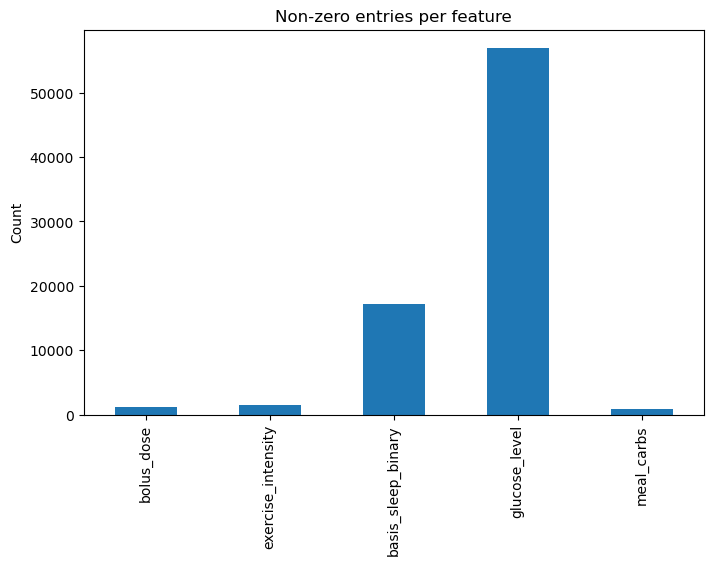

In [6]:
#Feature Presence & Non-Zero Counts
import matplotlib.pyplot as plt

cols = ["bolus_dose", "exercise_intensity", "basis_sleep_binary", "glucose_level", "meal_carbs"]
non_zero_counts = df[cols].astype(bool).sum()

non_zero_counts.plot(kind="bar", figsize=(8,5))
plt.title("Non-zero entries per feature")
plt.ylabel("Count")
plt.show()


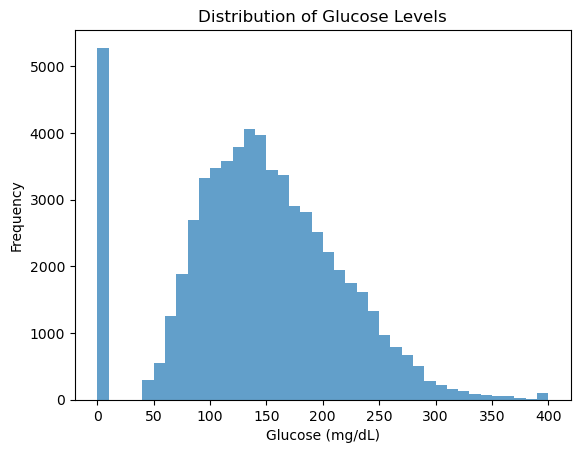

In [ ]:
#Glucose Distribution
df["glucose_level"].plot(kind="hist", bins=40, alpha=0.7)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose (mg/dL)")
plt.show()


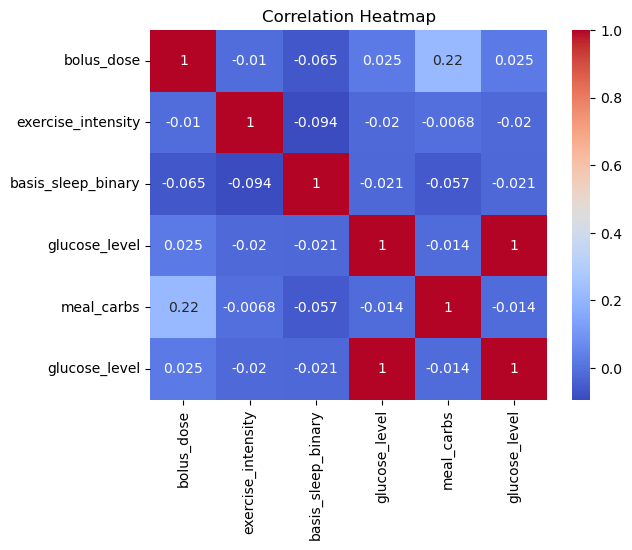

In [ ]:
#Correlation Heatmap: Pearson correlation
import seaborn as sns
sns.heatmap(df[cols + ["glucose_level"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



# Section 3: preprocessing and MODEL

In [9]:
#!pip install wrapt --upgrade
#!pip install termcolor --upgrade
#!pip install opt-einsum --upgrade
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow tensorflow-gpu

## 3-1: Data Parsing (load, select features,Proper glucose cleaning)

In [ ]:
import numpy as np
data_path = "home/training_2018/"
csv_files = sorted(glob.glob(os.path.join(data_path, "*.csv")))
assert csv_files, "No CSV files found."

dfs = []
for f in csv_files:
    tmp = pd.read_csv(f)
    tmp.columns = [c.strip() for c in tmp.columns]            
    tmp["timestamp"] = pd.to_datetime(
        tmp["timestamp"].astype(str).str.strip(),
        errors="coerce", infer_datetime_format=True
    )
    dfs.append(tmp)

df = pd.concat(dfs, ignore_index=True)
df = df.dropna(subset=["timestamp"]).sort_values("timestamp").reset_index(drop=True)

keep = ["timestamp", "bolus_dose", "exercise_intensity", "basis_sleep_binary", "glucose_level", "meal_carbs"]
missing = [c for c in keep if c not in df.columns]
assert not missing, f"Missing expected columns: {missing}"

data = df[keep].copy()
data.set_index("timestamp", inplace=True)
assert isinstance(data.index, pd.DatetimeIndex), "Index must be DatetimeIndex."


for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors="coerce")
g = data["glucose_level"].copy()
g[g <= 0] = np.nan                  
g = g.interpolate(method="time", limit_direction="both")
g = g.ffill().bfill()
g = g.clip(lower=40, upper=400)     
data["glucose_level"] = g

for c in data.columns:
    if c != "glucose_level":
        data[c] = data[c].fillna(0.0)

print("NaNs in glucose:", data["glucose_level"].isna().sum())
print("Zeros in glucose:", (data["glucose_level"] == 0).sum())
print("Glucose min/max:", float(data["glucose_level"].min()), float(data["glucose_level"].max()))

/tmp/ipykernel_1261/4134993572.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tmp["timestamp"] = pd.to_datetime(
/tmp/ipykernel_1261/4134993572.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tmp["timestamp"] = pd.to_datetime(
/tmp/ipykernel_1261/4134993572.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tmp["timestamp"] = pd.to_datetime(
/tmp/ipykernel_1261/4134993572.py:16: UserWarning: The argument 'infer_datetime

Sanity — NaNs in glucose: 0
Sanity — Zeros in glucose: 0
Sanity — Glucose min/max: 40.0 400.0


/tmp/ipykernel_1261/4134993572.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tmp["timestamp"] = pd.to_datetime(
/tmp/ipykernel_1261/4134993572.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tmp["timestamp"] = pd.to_datetime(


In [11]:
data
data.to_csv("data.csv", index=False)

In [12]:
df[df['bolus_dose'] != 0]

,timestamp,glucose_level,bolus_type,bolus_dose,bolus_bwz_carb_input,meal_type,meal_carbs,work_intensity,work_binary,exercise_intensity,...,basal,basis_air_temperature,basis_gsr,basis_skin_temperature,basis_steps,finger_stick,hypo_event,stressors,sleep_quality,sleep_binary
121,2021-07-12 11:20:00,235.0,normal,9.3,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,586.0,0.0,0.0,NaN,NaN
232,2021-07-12 18:30:00,93.0,square dual,4.1,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.00,0.0,95.0,0.0,NaN,NaN,NaN
323,2021-07-12 22:15:00,0.0,normal,0.7,0.0,0,0.0,0.0,0.0,0.0,...,0.0,80.06,0.000075,86.00,0.0,146.0,0.0,NaN,NaN,NaN
360,2021-07-12 23:50:00,0.0,normal,3.8,0.0,0,0.0,0.0,0.0,0.0,...,0.0,86.90,0.000121,90.68,0.0,352.0,0.0,0.0,NaN,NaN
489,2021-08-12 05:10:00,218.0,normal,4.1,45.0,Breakfast,45.0,0.0,0.0,0.0,...,0.0,84.74,0.000105,88.34,0.0,209.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61944,2022-12-01 12:30:00,239.0,square dual,9.4,0.0,Lunch,150.0,2.0,1.0,0.0,...,0.0,81.32,0.000238,86.36,3.0,0.0,0.0,NaN,NaN,NaN
62023,2022-12-01 15:50:00,271.0,normal,5.5,50.0,0,0.0,5.0,1.0,0.0,...,0.0,77.90,0.000074,81.86,5.0,0.0,0.0,0.0,NaN,NaN
62089,2022-12-01 18:35:00,146.0,normal dual,8.4,125.0,Dinner,125.0,0.0,0.0,0.0,...,0.0,84.20,0.213462,88.52,4.0,142.0,0.0,NaN,NaN,NaN
62092,2022-12-01 18:40:00,148.0,square dual,7.8,0.0,0,0.0,0.0,0.0,0.0,...,0.0,83.30,0.035622,88.16,0.0,0.0,0.0,NaN,NaN,NaN


# Section 4: Training LSTM

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
n = len(data)
train_end = int(n * 0.70)
val_end   = int(n * 0.85)
train_df = data.iloc[:train_end].copy()
val_df   = data.iloc[train_end:val_end].copy()
test_df  = data.iloc[val_end:].copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df.values)

train_scaled = scaler.transform(train_df.values)
val_scaled   = scaler.transform(val_df.values)
test_scaled  = scaler.transform(test_df.values)

feature_names = list(data.columns)
glucose_idx = feature_names.index("glucose_level")

def make_sequences(arr, n_steps, target_col_idx):
    X, y = [], []
    for i in range(len(arr) - n_steps):
        X.append(arr[i:i+n_steps, :])
        y.append(arr[i+n_steps, target_col_idx])
    return np.array(X), np.array(y)

n_steps = 12  
X_train, y_train = make_sequences(train_scaled, n_steps, glucose_idx)
X_val,   y_val   = make_sequences(val_scaled,   n_steps, glucose_idx)
X_test,  y_test  = make_sequences(test_scaled,  n_steps, glucose_idx)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

def to_tensor(x): return torch.from_numpy(x.astype(np.float32))

train_loader = DataLoader(TensorDataset(to_tensor(X_train), to_tensor(y_train).unsqueeze(-1)), batch_size=64, shuffle=True)
val_loader   = DataLoader(TensorDataset(to_tensor(X_val),   to_tensor(y_val).unsqueeze(-1)),   batch_size=64, shuffle=False)
test_loader  = DataLoader(TensorDataset(to_tensor(X_test),  to_tensor(y_test).unsqueeze(-1)),  batch_size=64, shuffle=False)

class GlucoseLSTM(nn.Module):
    def __init__(self, input_size, h1=64, h2=32, p=0.2):
        super().__init__()
        self.l1 = nn.LSTM(input_size=input_size, hidden_size=h1, batch_first=True)
        self.do = nn.Dropout(p)
        self.l2 = nn.LSTM(input_size=h1, hidden_size=h2, batch_first=True)
        self.fc = nn.Linear(h2, 1)
    def forward(self, x):
        x,_ = self.l1(x); x = self.do(x); x,_ = self.l2(x)
        return self.fc(x[:, -1, :])

model = GlucoseLSTM(input_size=X_train.shape[2]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

best_val = float("inf"); patience=5; pat=0; best_state=None
for ep in range(1, 26):
    model.train(); tr=0.0
    for xb,yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        tr += loss.item()*xb.size(0)
    tr /= len(train_loader.dataset)

    model.eval(); va=0.0
    with torch.no_grad():
        for xb,yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            va += criterion(model(xb), yb).item()*xb.size(0)
    va /= len(val_loader.dataset)
    print(f"Epoch {ep:02d} | Train MSE {tr:.5f} | Val MSE {va:.5f}")

    if va < best_val - 1e-6:
        best_val = va; best_state = {k: v.detach().cpu() for k,v in model.state_dict().items()}; pat=0
    else:
        pat += 1
        if pat >= patience:
            print("Early stopping."); break

if best_state is not None: model.load_state_dict(best_state)
model.eval().to(device)

def torch_predict(loader):
    outs=[]
    with torch.no_grad():
        for xb,_ in loader:
            outs.append(model(xb.to(device)).cpu().numpy())
    return np.vstack(outs).ravel()

y_pred_train = torch_predict(train_loader)
y_pred_val   = torch_predict(val_loader)
y_pred_test  = torch_predict(test_loader)

def invert_glucose(y_scaled, scaler, glucose_idx, feature_names):
    tmp = np.zeros((len(y_scaled), len(feature_names)), dtype=np.float32)
    tmp[:, glucose_idx] = y_scaled
    return scaler.inverse_transform(tmp)[:, glucose_idx]

inv_y_train    = invert_glucose(y_train.ravel(),   scaler, glucose_idx, feature_names)
inv_y_val      = invert_glucose(y_val.ravel(),     scaler, glucose_idx, feature_names)
inv_y_test     = invert_glucose(y_test.ravel(),    scaler, glucose_idx, feature_names)
inv_pred_train = invert_glucose(y_pred_train,      scaler, glucose_idx, feature_names)
inv_pred_val   = invert_glucose(y_pred_val,        scaler, glucose_idx, feature_names)
inv_pred_test  = invert_glucose(y_pred_test,       scaler, glucose_idx, feature_names)

print("TRAIN inv glucose min/max:", inv_y_train.min(), inv_y_train.max())
print("TEST  inv glucose min/max:",  inv_y_test.min(),  inv_y_test.max())
assert inv_y_train.min() > 0, "Train glucose has zeros; check preprocessing."
assert inv_y_test.min()  > 0, "Test glucose has zeros; check preprocessing."

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = lambda a,b: mean_squared_error(a,b,squared=False)
mae  = lambda a,b: mean_absolute_error(a,b)

print(f"Train RMSE {rmse(inv_y_train, inv_pred_train):.2f} | MAE {mae(inv_y_train, inv_pred_train):.2f}")
print(f"Val   RMSE {rmse(inv_y_val,   inv_pred_val):.2f} | MAE {mae(inv_y_val,   inv_pred_val):.2f}")
print(f"Test  RMSE {rmse(inv_y_test,  inv_pred_test):.2f} | MAE {mae(inv_y_test,  inv_pred_test):.2f}")

Shapes: (43541, 12, 5) (9321, 12, 5) (9321, 12, 5)
Using device: cuda
Epoch 01 | Train MSE 0.01280 | Val MSE 0.01360
Epoch 02 | Train MSE 0.00963 | Val MSE 0.01270
Epoch 03 | Train MSE 0.00893 | Val MSE 0.01239
Epoch 04 | Train MSE 0.00878 | Val MSE 0.01236
Epoch 05 | Train MSE 0.00884 | Val MSE 0.01229
Epoch 06 | Train MSE 0.00871 | Val MSE 0.01228
Epoch 07 | Train MSE 0.00866 | Val MSE 0.01295
Epoch 08 | Train MSE 0.00861 | Val MSE 0.01232
Epoch 09 | Train MSE 0.00850 | Val MSE 0.01231
Epoch 10 | Train MSE 0.00825 | Val MSE 0.01198
Epoch 11 | Train MSE 0.00767 | Val MSE 0.01130
Epoch 12 | Train MSE 0.00726 | Val MSE 0.01095
Epoch 13 | Train MSE 0.00681 | Val MSE 0.01031
Epoch 14 | Train MSE 0.00649 | Val MSE 0.00993
Epoch 15 | Train MSE 0.00628 | Val MSE 0.01000
Epoch 16 | Train MSE 0.00611 | Val MSE 0.00969
Epoch 17 | Train MSE 0.00601 | Val MSE 0.00974
Epoch 18 | Train MSE 0.00596 | Val MSE 0.00956
Epoch 19 | Train MSE 0.00587 | Val MSE 0.00956
Epoch 20 | Train MSE 0.00586 | Val MS

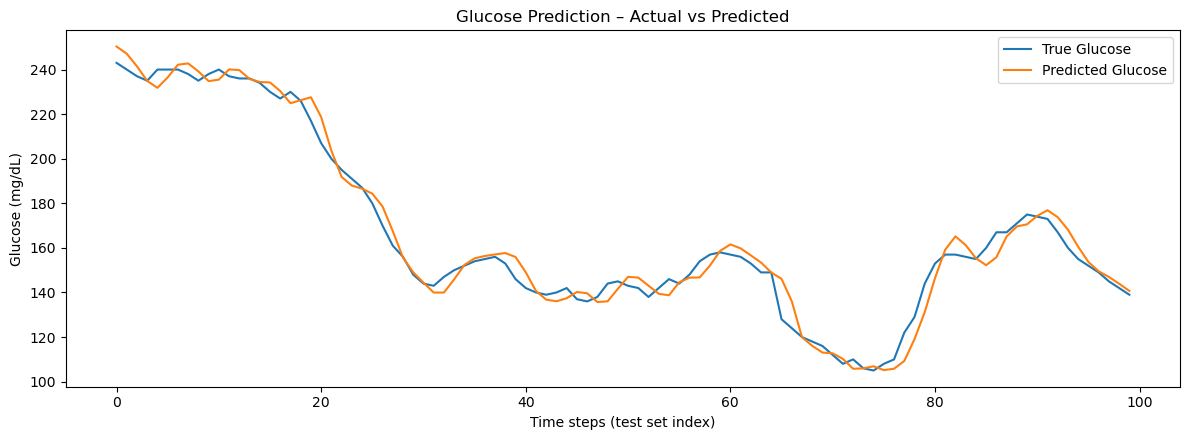

In [ ]:
import matplotlib.pyplot as plt
k=400
plt.figure(figsize=(12,4.5))
plt.plot(inv_y_test[300:k],  label="True Glucose")
plt.plot(inv_pred_test[300:k], label="Predicted Glucose")
plt.ylabel("Glucose (mg/dL)"); plt.xlabel("Time steps (test set index)")
plt.title("Glucose Prediction – Actual vs Predicted")
plt.legend(); plt.tight_layout(); plt.show()

# Section 5: Interactive prediction:
A new user  enters their most recent bolus, exercise, sleep status, and glucose readings, and the model predicts the next glucose level.

In [ ]:
import numpy as np
import torch

def predict_next_glucose(model, scaler, feature_names, glucose_idx, recent_df, n_steps=12, device="cpu"):
    assert len(recent_df) >= n_steps, f"Need at least {n_steps} rows"
    arr = scaler.transform(recent_df.values)
    window = arr[-n_steps:, :]
    x = torch.from_numpy(window.astype(np.float32)).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        y_scaled = model(x).cpu().numpy().ravel()[0]
    tmp = np.zeros((1, len(feature_names)))
    tmp[:, glucose_idx] = y_scaled
    inv = scaler.inverse_transform(tmp)
    return float(inv[0, glucose_idx])

In [54]:
# Take the last n_steps rows from test_df
recent_window = test_df.tail(n_steps)

next_glu = predict_next_glucose(
    model, scaler, feature_names, glucose_idx, recent_window,
    n_steps=n_steps, device=device
)
print("Predicted next glucose:", next_glu, "mg/dL")


Predicted next glucose: 144.90847945213318 mg/dL
